In [44]:
#導入套件
import pandas as pd
import jieba
import jieba.analyse
import numpy as np
from collections import Counter
from tqdm import tqdm

#導入要分析的資料
orgdata = pd.read_csv("sea.csv")

In [43]:
orgdata.head()

,CName,EName,CToldescribe,CAdd,Picdescribe1C,seg
0,隘門沙灘,Aimen beach,隘門沙灘由珊瑚與貝殼碎屑、孔蟲遺骸等組成，其中以星狀的有孔蟲最令遊客驚艷。原本默默無聞的隘門...,澎湖縣湖西鄉隘門村,隘門沙灘,"[隘門, 沙灘, 孔蟲, 遊客, 整建, 貝殼, 遺骸, 組成, 以星狀, 驚艷, 無聞, ..."
1,吉貝嶼,Jibeiyu,吉貝嶼全島面積約3.1平方公里，海岸線長約13公里，是北海最大的島嶼，國內最熱門的旅遊景點。...,澎湖縣白沙鄉吉貝嶼,吉貝嶼,"[全島, 島嶼, 沙灘, 公尺, 沙嘴, 地形, 吉貝嶼, 面積, 3.1, 線長, 13,..."
2,青洲濱海遊憩區,Qingzhou Coastal Recreation Area,擁有蔚藍海洋與陽光沙灘的青洲濱海遊憩區，佔地約7.6公頃，位於大鵬灣潟湖唯一出海口西南側，背...,屏東縣東港鎮南平路631號,青洲濱海遊憩區,"[大鵬灣, 海天一色, 小琉球, 青洲, 擁有, 與陽光, 沙灘, 濱海遊, 憩區, 7.6..."
3,潮口平台,Bayfun Land,想要來大鵬灣體驗獨木舟，那就絕不能錯過水域遊憩新景點－－潮口平台，這裡有著最夯的「紅樹林探索...,屏東縣東港鎮大鵬灣紅樹林復育濕地公園,潮口平台,"[體驗, 木舟, 遊憩, 活動, 進行, 水道, 水域, 新景, 來大鵬灣, 那就絕, 錯過..."
4,風帆咖啡廳,Windsurfing Café,南風徐徐，陽光暖暖，來到大鵬灣國家風景區─濱灣碼頭(帆船基地)，將會發現這裡有難得一見的帆船...,NaN,風帆咖啡廳,"[大鵬灣, 帆船, 活動, 基地, 木舟, 南風, 陽光, 國家, 風景區, 濱灣, 碼頭,..."


In [34]:
orgdata['seg'] = " "
orgdata.head()

,CName,EName,CToldescribe,CAdd,Picdescribe1C,seg
0,隘門沙灘,Aimen beach,隘門沙灘由珊瑚與貝殼碎屑、孔蟲遺骸等組成，其中以星狀的有孔蟲最令遊客驚艷。原本默默無聞的隘門...,澎湖縣湖西鄉隘門村,隘門沙灘,
1,吉貝嶼,Jibeiyu,吉貝嶼全島面積約3.1平方公里，海岸線長約13公里，是北海最大的島嶼，國內最熱門的旅遊景點。...,澎湖縣白沙鄉吉貝嶼,吉貝嶼,
2,青洲濱海遊憩區,Qingzhou Coastal Recreation Area,擁有蔚藍海洋與陽光沙灘的青洲濱海遊憩區，佔地約7.6公頃，位於大鵬灣潟湖唯一出海口西南側，背...,屏東縣東港鎮南平路631號,青洲濱海遊憩區,
3,潮口平台,Bayfun Land,想要來大鵬灣體驗獨木舟，那就絕不能錯過水域遊憩新景點－－潮口平台，這裡有著最夯的「紅樹林探索...,屏東縣東港鎮大鵬灣紅樹林復育濕地公園,潮口平台,
4,風帆咖啡廳,Windsurfing Café,南風徐徐，陽光暖暖，來到大鵬灣國家風景區─濱灣碼頭(帆船基地)，將會發現這裡有難得一見的帆船...,NaN,風帆咖啡廳,


In [42]:

jieba.analyse.set_stop_words("stopwords.txt")
index = 0
for documents in orgdata['CToldescribe']:
    seg_list = jieba.analyse.extract_tags(str(documents), 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [37]:
orgdata['seg']

0     [隘門, 沙灘, 孔蟲, 遊客, 整建, 貝殼, 遺骸, 組成, 以星狀, 驚艷, 無聞, ...
1     [全島, 島嶼, 沙灘, 公尺, 沙嘴, 地形, 吉貝嶼, 面積, 3.1, 線長, 13,...
2     [大鵬灣, 海天一色, 小琉球, 青洲, 擁有, 與陽光, 沙灘, 濱海遊, 憩區, 7.6...
3     [體驗, 木舟, 遊憩, 活動, 進行, 水道, 水域, 新景, 來大鵬灣, 那就絕, 錯過...
4     [大鵬灣, 帆船, 活動, 基地, 木舟, 南風, 陽光, 國家, 風景區, 濱灣, 碼頭,...
5     [大鵬灣, 帆船, 活動, 基地, 木舟, 南風, 陽光, 國家, 風景區, 濱灣, 碼頭,...
6     [花瓶, 岩其實, 一塊, 因長, 期受, 差異性, 侵蝕, 頭大身, 外觀, 類似, 岩頂...
7     [美人洞, 每一景, 奇石, 各有千秋, 十三, 探幽, 蝙蝠洞, 礁岩, 值得, 洞位, ...
8     [沙灘, 小琉球, 幸運, 避免, 夏季, 在岸, 澳沙灘, 龜長, 大後會, 回來, 產卵...
9     [西港, 廢港, 處場, 沙灘, 設施, 適合, 各類, 遊憩, 活動, 及練習, 場域, ...
10    [沙溝, 規劃, 活動, 當時, 設施, 濱海遊, 憩區, 一個, 傳統, 漁村, 昏時分,...
11    [國境, 北疆, 中華民國, 國之, 北固礁, 遊客, 岬角, 礁石, 最南到, 群島, 最...
12    [潮音, 燕秀, 引發, 山谷, 谷底, 燕子, 海桐, 一處, 海風洞, 引島, 南側, ...
13                                     [壯麗, 淒美, 懸崖, 巍峨]
14    [燈塔, 東湧, 聳立, 懸崖, 興建, 白色, 峭壁, 塔外, 尾山, 一座, 引島, 全...
15    [一線, 岩壁, 十公尺, 天位, 引島, 東側, 左側, 一處, 聳峭, 海蝕溝, 相鄰,...
16    [石頭, 芹壁, 老酒, 青蛙, 北竿, 風情, 時期, 當地, 隨處, 鐵甲元帥, 聚落,...
17    [沙灘, 坂里, 遊客, 閃耀著, 細軟, 海景, 白色, 一片, 光芒, 海岸, 

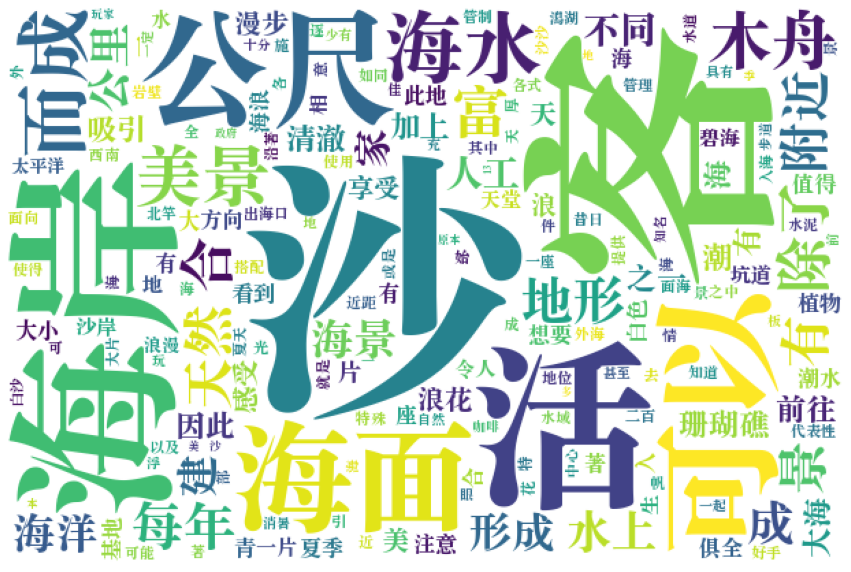

In [39]:
data_seg_list = orgdata['seg'].tolist()
type(data_seg_list)
flat = [x for datalist in data_seg_list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("sea.png"))
font = "/System/Library/Fonts/Supplemental/Songti.ttc"

wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize=(15,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()